In [ ]:
# Download latest version

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL
from PIL import Image
import kagglehub

path = kagglehub.dataset_download("ashwingupta3012/male-and-female-faces-dataset")
print("Path to dataset files:", path)



100%|██████████| 1.63G/1.63G [00:24<00:00, 71.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1


Number of Male Images =  2720
Number of Female Images =  2698
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


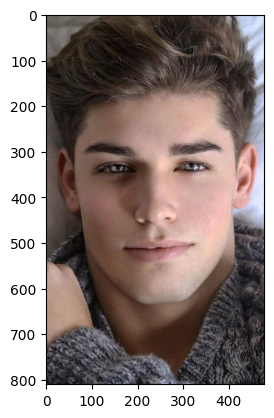

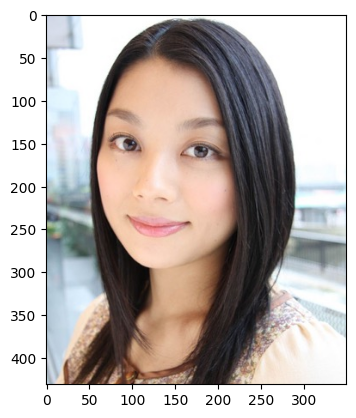

In [ ]:
# Assign labels to the images: 1 for male and 0 for female, Combine male and female labels into a single list , Display dataset shape




import os
male_file = os.listdir('/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Male Faces')
female_file = os.listdir('/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Female Faces')

print("Number of Male Images = ", len(male_file))
print("Number of Female Images = ", len(female_file))

male_label = [1]*len(male_file)
female_label = [0]*len(female_file)


labels = male_label + female_label
print(labels[:5])
print(labels[-5:])


img = mimg.imread("/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Male Faces/1 (1005).jpg")
plot = plt.imshow(img)
plt.show()

img=mimg.imread("/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Female Faces/0 (10).jpg")
plot=plt.imshow(img)
plt.show()

2720 2698


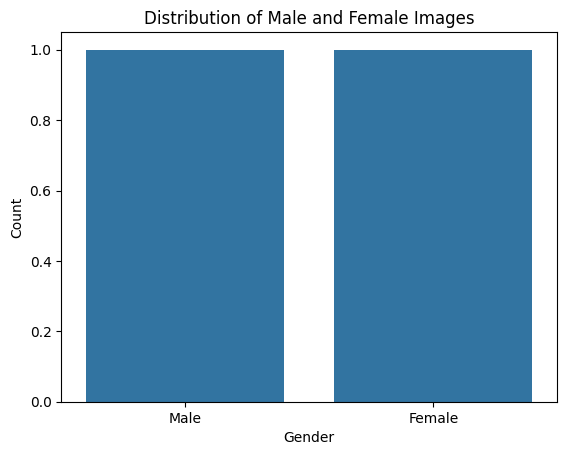

In [ ]:
# Display Data balancing

import matplotlib.pyplot as plt
import seaborn as sns

num_male = len(male_file)
num_female = len(female_file)
labels = ['Male', 'Female']


sns.countplot(x=labels, data=pd.DataFrame({'gender': labels, 'count': [num_male, num_female]}))

print(num_male,num_female)
plt.title('Distribution of Male and Female Images')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


In [ ]:
# Define the path to the directory , Initializing data paths , Resizing images , Convert to RGB

data=[]

male_path='/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Male Faces'

for file in os.listdir(male_path):
    file_path = os.path.join(male_path, file)

    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)


female_path='/root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset/Female Faces'

for file in os.listdir(female_path):
    file_path = os.path.join(female_path, file)


    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)



print(len(data))
print(len(labels))

data[0].shape


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5418
2


(128, 128, 3)

In [ ]:
# Convert to numpy array
X=np.array(data)
Y=np.array(labels)

X.shape,Y.shape


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

x_train_scl=x_train/255
x_test_scl=x_test/255


In [ ]:
# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.50),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.50),

    keras.layers.Dense(2, activation='sigmoid')
    ])
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,257,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,266,434 (62.05 MB)

 Trainable params: 16,266,434 (62.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compile the model

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:


# Train the model on the training data for 10 epochs

Model=model.fit(x_train_scl,y_train,validation_split=0.1,epochs=10)




Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.5628 - loss: 1.7993 - val_accuracy: 0.8648 - val_loss: 0.4249
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8338 - loss: 0.3913 - val_accuracy: 0.9365 - val_loss: 0.1788
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9472 - loss: 0.1558 - val_accuracy: 0.9652 - val_loss: 0.1000
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9682 - loss: 0.0989 - val_accuracy: 0.9857 - val_loss: 0.0591
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9817 - loss: 0.0562 - val_accuracy: 0.9877 - val_loss: 0.0475
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9905 - loss: 0.0351 - val_accuracy: 0.9836 - val_loss: 0.0527
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9795 - val_loss: 0.0983
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9896 - loss: 0.0318 - val_ac

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9834 - loss: 0.0812
The Accuracy =  98 %


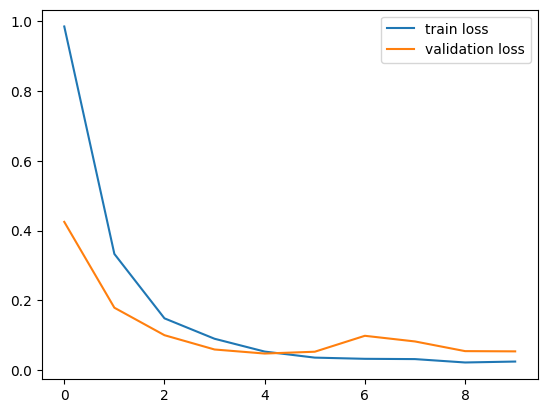

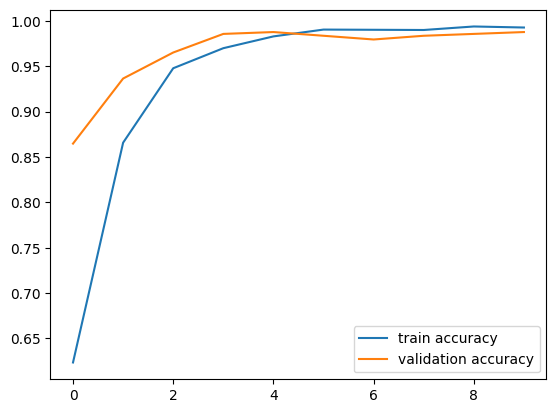

In [ ]:
# Evaluate the model on the test data

# Plot the training and validation loss

# Plot the training and validation accuracy

loss, acc = model.evaluate(x_test_scl, y_test)
print('The Accuracy = ', int(acc * 100), '%')

h = Model

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()




In [ ]:
model.save('gender_classification_model.h5')  # Save the model in HDF5 format

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


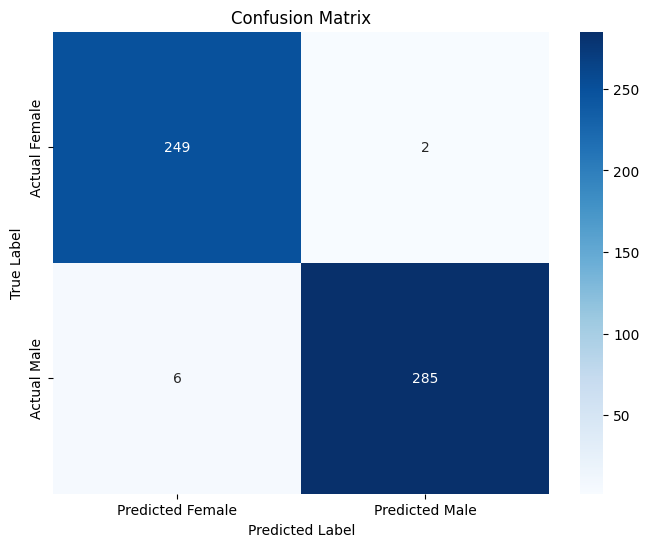

Training Accuracy: 0.9927
Validation Accuracy: 0.9877
Test Accuracy: 0.9852
Precision: 0.99
Recall: 0.98
F1 Score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       251
           1       0.99      0.98      0.99       291

    accuracy                           0.99       542
   macro avg       0.98      0.99      0.99       542
weighted avg       0.99      0.99      0.99       542



In [ ]:
# Display Confusion Matrix

# Calculate and print the training, validation, and test accuracy

# Print the classification report (includes precision, recall, F1-score)


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns



y_pred = model.predict(x_test_scl)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

cm_df = pd.DataFrame(cm, index=['Actual Female', 'Actual Male'], columns=['Predicted Female', 'Predicted Male'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

train_accuracy = Model.history['accuracy'][-1]
val_accuracy = Model.history['val_accuracy'][-1]
test_accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)


print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

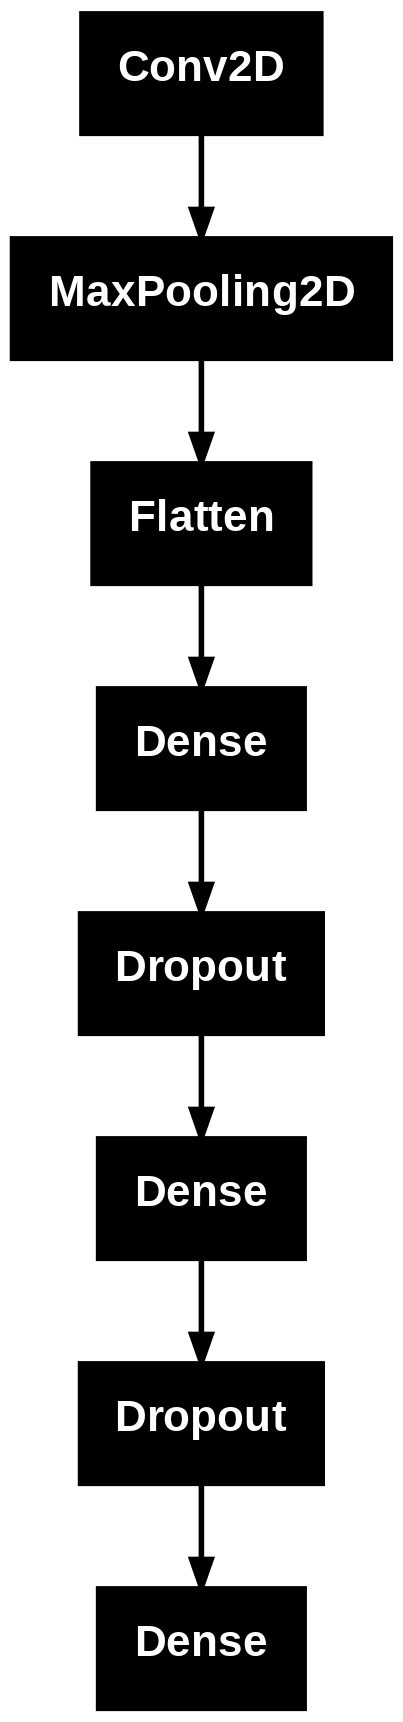

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

Enter the image path: /content/222222.jpeg


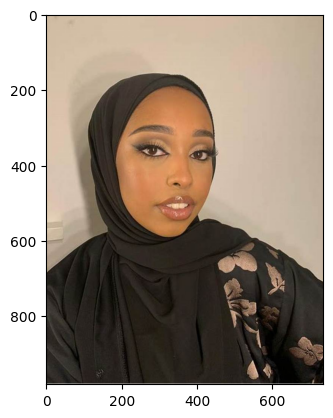

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
[[0.8280042  0.06307891]]
0
The person in the image is Female


In [ ]:
# Prediction Section

import matplotlib.image as mimg
import matplotlib.pyplot as plt
import cv2

def predict_gender(image_path):

    img = mimg.imread(image_path)
    plt.imshow(img)
    plt.show()


    img = cv2.resize(img, (128, 128))
    img = img / 255
    img = np.reshape(img, [1, 128, 128, 3])


    prediction = model.predict(img)
    print(prediction)


    input_pred_label = np.argmax(prediction)
    print(input_pred_label)


    if input_pred_label == 1:
        print('The person in the image is Male')
    else:
        print('The person in the image is Female')


input_image = input("Enter the image path: ")
predict_gender(input_image)
